In [1]:
import os
import cv2
import numpy as np
import random
from itertools import combinations
import matplotlib.pyplot as plt

In [2]:
# Fijar semilla
SEED = 42
random.seed(SEED)
np.random.seed(SEED)

In [3]:
IMG_SIZE = (150, 50)  # Ancho x alto
DATASET_DIR = "./resources"  # Cambia esta ruta si es necesario

In [4]:
def preprocess_image(path):
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, IMG_SIZE)
    img = img / 255.0  # Normalizar
    img = np.expand_dims(img, axis=-1)  # Canal adicional
    return img


In [5]:
def load_dataset(dataset_dir):
    data = {}
    for person in os.listdir(dataset_dir):
        person_dir = os.path.join(dataset_dir, person)
        if os.path.isdir(person_dir):
            images = []
            for fname in os.listdir(person_dir):
                fpath = os.path.join(person_dir, fname)
                try:
                    img = preprocess_image(fpath)
                    images.append(img)
                except:
                    print(f"Error cargando: {fpath}")
            if len(images) >= 2:
                data[person] = images
    return data


In [6]:
def generate_pairs(data, num_negatives_per_positive=1):
    pairs = []
    labels = []

    for person, imgs in data.items():
        for img1, img2 in combinations(imgs, 2):
            pairs.append([img1, img2])
            labels.append(1)  # Positivo

            for _ in range(num_negatives_per_positive):
                other_person = random.choice([p for p in data if p != person])
                img_negative = random.choice(data[other_person])
                pairs.append([img1, img_negative])
                labels.append(0)  # Negativo

    return np.array(pairs), np.array(labels)


In [7]:
print("📂 Cargando dataset...")
data = load_dataset(DATASET_DIR)

print("🔧 Generando pares de entrenamiento...")
pairs, labels = generate_pairs(data)

X1 = np.array([pair[0] for pair in pairs])
X2 = np.array([pair[1] for pair in pairs])
y = np.array(labels)

print(f"✅ Listo. Pares generados: {len(pairs)}")
print(f"X1 shape: {X1.shape}, X2 shape: {X2.shape}, y shape: {y.shape}")


📂 Cargando dataset...
🔧 Generando pares de entrenamiento...
✅ Listo. Pares generados: 100
X1 shape: (100, 50, 150, 1), X2 shape: (100, 50, 150, 1), y shape: (100,)


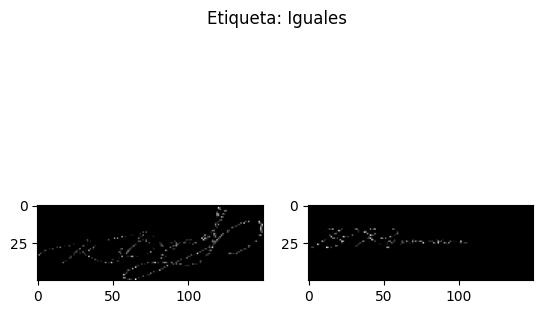

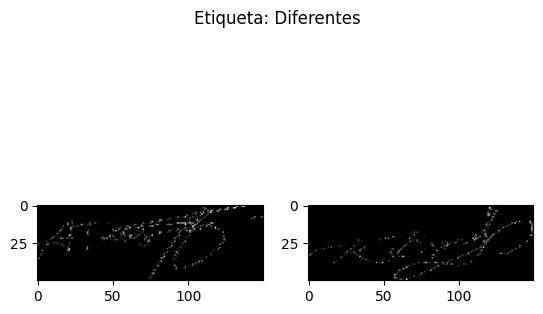

In [9]:
def show_pair(img1, img2, label):
    fig, ax = plt.subplots(1, 2)
    ax[0].imshow(img1.squeeze(), cmap="gray")
    ax[1].imshow(img2.squeeze(), cmap="gray")
    plt.suptitle(f"Etiqueta: {'Iguales' if label == 1 else 'Diferentes'}")
    plt.show()

# Ver un ejemplo aleatorio
i = random.randint(0, len(X1) - 1)
show_pair(X1[i], X2[i], y[i])


# Mostrar un par negativo (etiqueta = 0)
for i in range(len(y)):
    if y[i] == 0:
        show_pair(X1[i], X2[i], y[i])
        break